# Supplement to Lab on Supervised Learning

Some more advanced tools in supervised learning. **These are completely optional.** To use these tools correctly, one should really have a strong grasp on other aspects of statistical learning that are not discussed in this course.

## Classification

### F-1 Score

Using the precision and recall, we can also calculate a few other useful metrics:

**F-1 Score** This is the harmonic mean between recall and precision. You might think of it as the number of correct target classifications ($TP$) over the "average definition of 'correct'" between the model and reality.

$$F_1 = 2 \,\frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} = \frac{\text{TP}}
     {\frac{1}{2}((\text{TP} + \text{FP}) + (\text{TP} + \text{FN}))}$$
     
**F-beta Score** This is a general form of the F-1 Score, assigning $\beta$ times more importance to recall than precision.

$$
F_{\beta} = \frac{\beta^2 \times \text{precision} + 1 \times \text{recall}}{\beta^2 + 1}
$$

**F-1 or F-beta scores should only be used to *compare* models. Not evaluate a single model.**

In [98]:
from sklearn.metrics import f1_score, fbeta_score

In [99]:
print('f-1 score: ', round(f1_score(y, y_pred), 3))
print('f-2 score:  ', round(fbeta_score(y, y_pred, beta = 2), 3))

f-1 score:  0.928
f-2 score:   0.933


### Receiver Operating Characteristic

The Receiver Operating Characteristic (ROC) curve (a term used to describe its first use case: military radar receivers during WWI) plots the True Positive Rate (TPR, or Sensitivity) against the False Positive Rate (FPR, or 1-Specificity) for different threshold values for "positive" classification.

$$
\text{Sensitivity} = \text{Recall (TPR)} = \frac{\text{TP}}{\text{TP} + \text{FN}}\quad\text{and}\quad
\text{1 - Specificity} = \text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
$$

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score

In [108]:
def plot_roc(y_true, y_preds, model_label='Fitted Model'):
    '''
    Plot the ROC Curve **for binary classification**.
    
    `y_preds`: 1-d array
        probabilities for the positive target class
    '''
    fpr, tpr, t = roc_curve(y_true, y_preds)
    auc = roc_auc_score(y_true, y_preds)
    
    g = sns.lineplot(x=fpr, y=tpr, label=model_label, errorbar=None)
    
    g.axline(xy1=(0, 0), slope=1, color = 'gray', ls = 'dashed', label="Random Model")
    g.set_xlabel("Sensitivity (Recall)")
    g.set_ylabel("1 - Specificity (FPR)")
    g.set_title(f"ROC Curve (AUC = {round(auc, 2)})")
    g.legend()
    
    return g

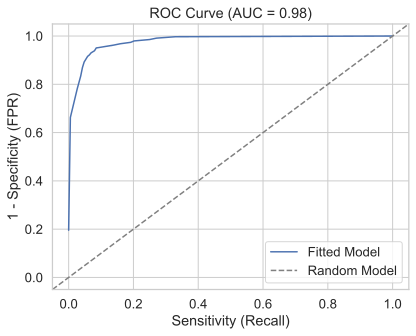

In [109]:
g = plot_roc(y, y_proba[:, 1])

The closer the curve is to the diagonal line, the more it resembles a naive random model which predits the target class 50% of the time.

It can be proven that **the Area Under this Curve (AUC)** represents the probability that a class 1 point is correctly ranked above a class 0 point, where class 1 is our target class, each prediction is ranked by the model prediction probabilities.

In other words, *an AUC of 0.75 means for two data points belonging to separate classes, there is a 75% chance the model would be able to segregate them or "rank order" their probability correctly.*

**Caveats**
- <span style='color: darkgreen'>Great</span> for comparing how models distinguish between classes
- <span style='color: darkgreen'>Great</span> if model probabilities will be used to rank order its predictions
- AUC is <span style='color: darkred'> not</span> as effective in class imbalance scenarios
- AUC is <span style='color: darkred'> not</span> enough to evaluate a model
- ROC-AUC is <span style='color: darkred'> not</span> goodness of fit metric
- ROC-AUC is <span style='color: darkred'> not</span> designed for multiclass problems